In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load file
df = pd.read_csv("C:\\Users\\gursi\\Downloads\\occupancy_sample (1).csv")

# Quick look
print(df.head())


   time_ms  PIR  distance_cm  presence
0    46668    0         9999         0
1    47370    0         9999         0
2    48072    0         9999         0
3    48774    0         9999         0
4    49476    0         9999         0


In [5]:

df['time_s'] = (df['time_ms'] - df['time_ms'].iloc[0]) / 1000


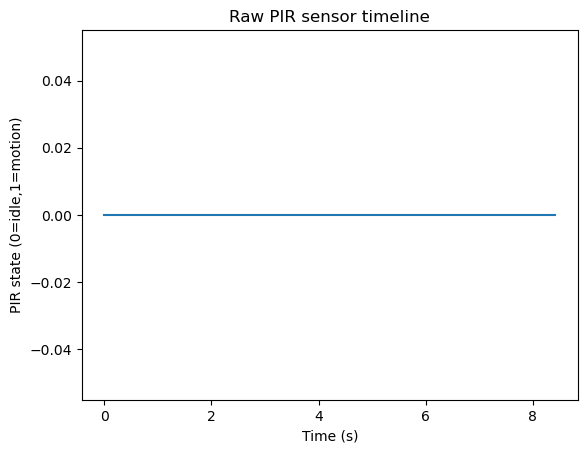

In [6]:
plt.figure()
plt.step(df['time_s'], df['PIR'], where='post')
plt.xlabel("Time (s)")
plt.ylabel("PIR state (0=idle,1=motion)")
plt.title("Raw PIR sensor timeline")
plt.show()


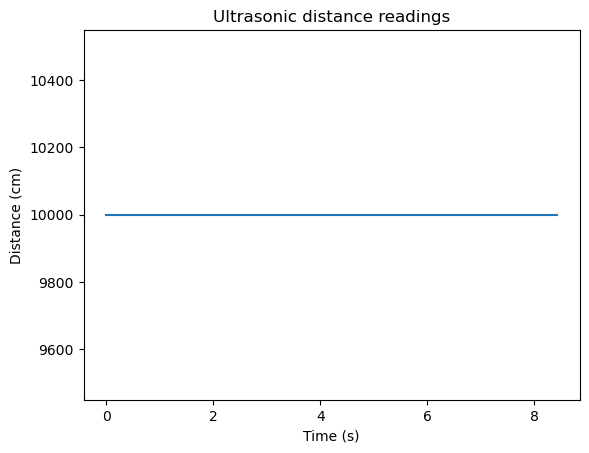

In [7]:
#Distance vs Time
plt.figure()
plt.plot(df['time_s'], df['distance_cm'])
plt.xlabel("Time (s)")
plt.ylabel("Distance (cm)")
plt.title("Ultrasonic distance readings")
plt.show()


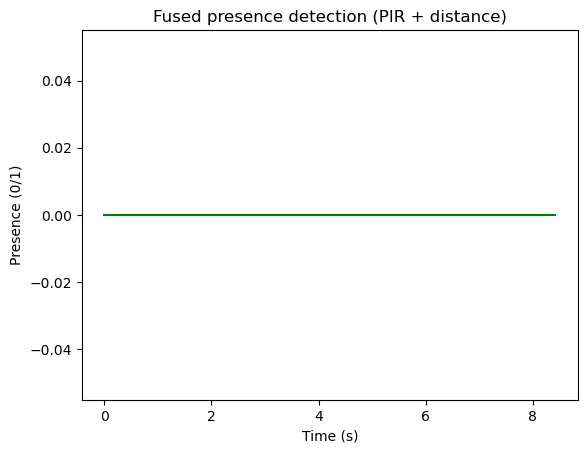

In [8]:
#Fusion (Presence) vs Time
plt.figure()
plt.step(df['time_s'], df['presence'], where='post', color='green')
plt.xlabel("Time (s)")
plt.ylabel("Presence (0/1)")
plt.title("Fused presence detection (PIR + distance)")
plt.show()


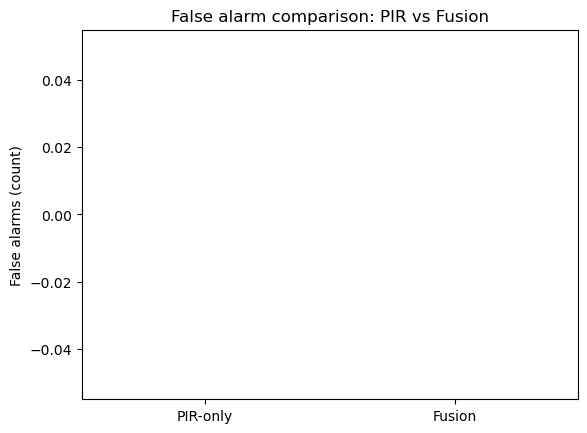

In [9]:
#False Alarms
pir_only_false = ((df['PIR']==1) & (df['presence']==0)).sum()
fusion_false   = ((df['presence']==1) & (df['distance_cm']>=120)).sum() # adjust rule if needed

plt.figure()
plt.bar(['PIR-only','Fusion'], [pir_only_false, fusion_false])
plt.ylabel("False alarms (count)")
plt.title("False alarm comparison: PIR vs Fusion")
plt.show()
